In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

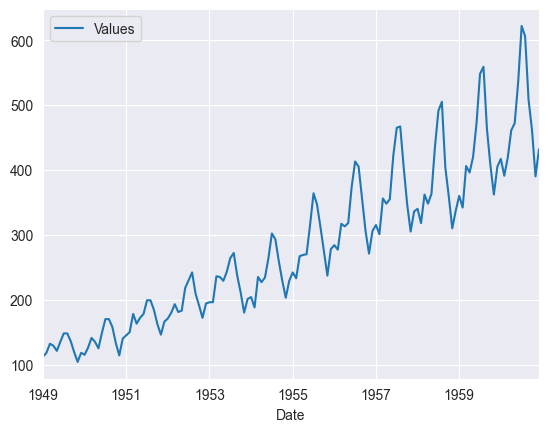

In [25]:
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.columns = ['Date', 'Values']
df['Year'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df['Relative_Time'] = df.index + 1
df.plot(x='Date', y='Values');

In [26]:
stats.pearsonr(df.Relative_Time, df.Values)[1]

4.020274506593502e-61

In [27]:
stats.pearsonr(df.Relative_Time[:15], df.Values[:15])[1]

0.9074728280824952

In [28]:
stats.spearmanr(df.Relative_Time, df.Values)[1]

1.3461990272764129e-74

In [29]:
stats.spearmanr(df.Relative_Time[:15], df.Values[:15])[1]

0.8543150802213386

In [30]:
stats.kendalltau(df.Relative_Time, df.Values)[1]

6.584144856287916e-47

In [31]:
stats.kendalltau(df.Relative_Time[:15], df.Values[:15])[1]

0.7283947649545108

In [32]:
lin_model = linear_model.LinearRegression()
lin_model.fit(np.array(df.Relative_Time).reshape(-1, 1), np.array(df.Values))
res = lin_model.predict(np.array(df.Relative_Time).reshape(-1, 1))

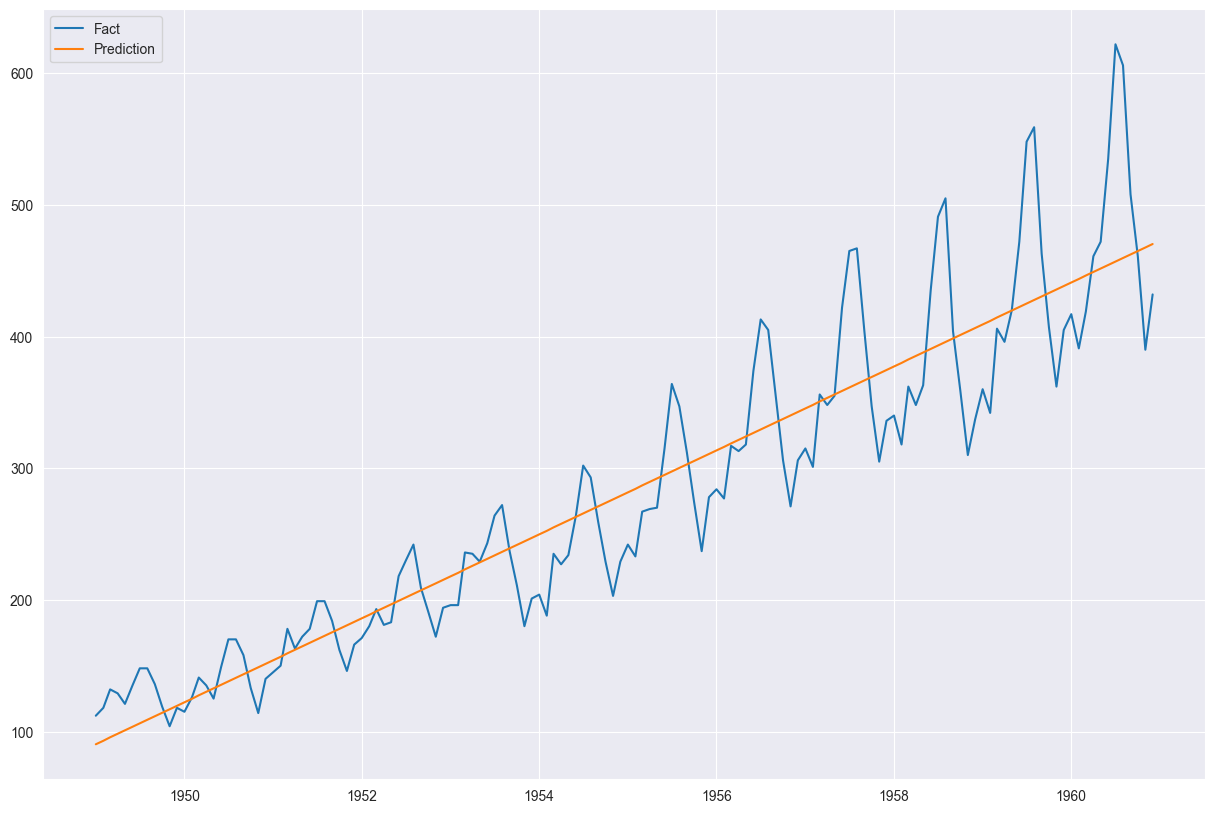

In [33]:
df['Pred'] = res

plt.figure(figsize=(15, 10))
plt.plot(df.Date, df.Values, label='Fact')
plt.plot(df.Date, df.Pred, label='Prediction')
plt.legend();

In [34]:
lin_model = linear_model.LinearRegression()
lin_model.fit(np.array(df[['Month', 'Year']]), np.array(df.Values))
res = lin_model.predict(np.array(df[['Month', 'Year']]))

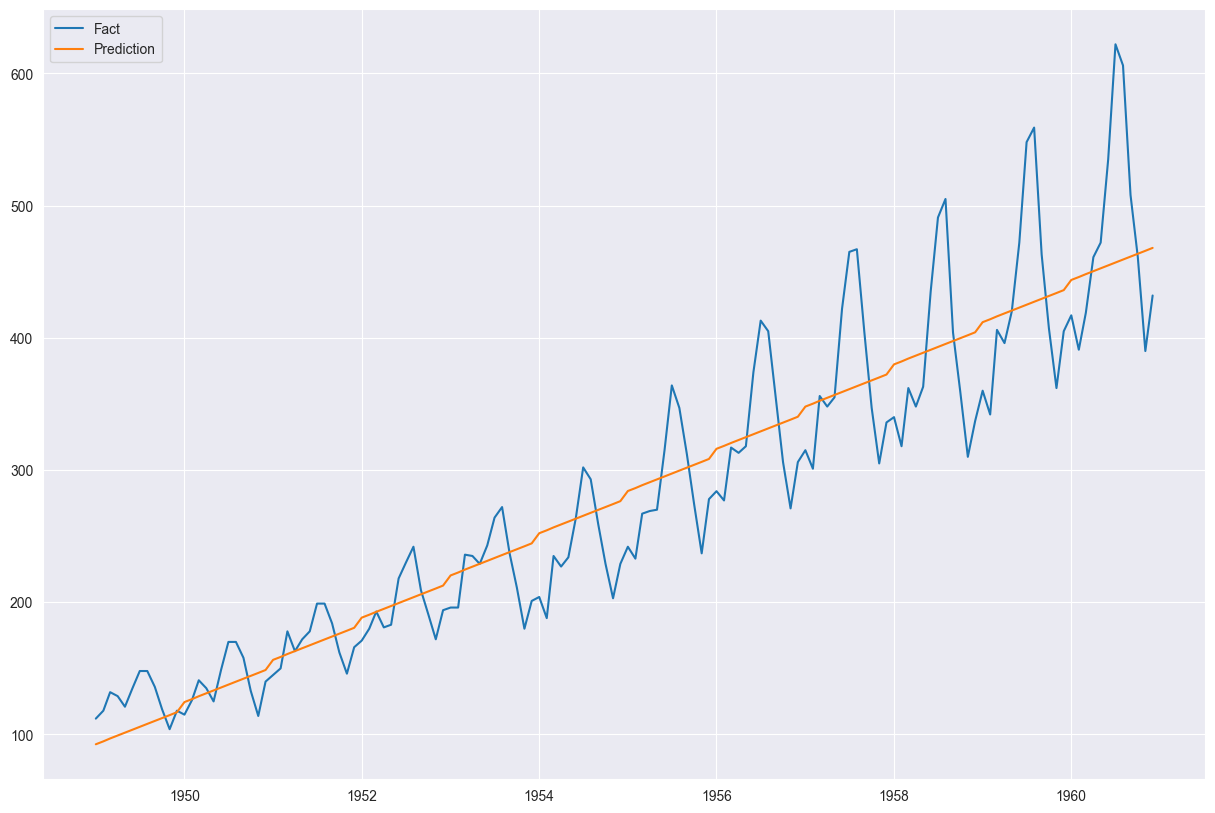

In [35]:
df['Pred_2'] = res

plt.figure(figsize=(15, 10))
plt.plot(df.Date, df.Values, label='Fact')
plt.plot(df.Date, df.Pred_2, label='Prediction')
plt.legend();

In [36]:
mean_squared_error(df.Values, df.Pred)

2091.7994339346533

In [37]:
r2_score(df.Values, df.Pred)

0.853638165603188

In [38]:
root_mean_squared_error(df.Values, df.Pred)

45.73619391613882

In [39]:
mean_squared_error(df.Values, df.Pred_2)

2089.33780749539

In [40]:
r2_score(df.Values, df.Pred_2)

0.8538104039905808

In [41]:
root_mean_squared_error(df.Values, df.Pred_2)

45.70927485199683

In [42]:
mean_absolute_percentage_error(df.Values, df.Pred_2)

0.12274400180348725